# Quantum walk hydrodynamics

Original authors of paper: Mohamed Hatifi, Giuseppe Di Molfetta, Fabrice Debbasch & Marc Brachet

Author of notebook: Óscar Amaro (2023)

__Note__: in figure 1 I was not able to reproduce the apparent drift of plots b, c, d; rather obtained more symemtric shock structures. For the Pearcey integral, this [code](https://github.com/dpiponi/caustics) could maybe be useful.

__TODO__: figure 2d, figure 3


In [36]:
import numpy as np
from numpy import pi, cos, sin, sqrt, exp
from scipy import integrate
import matplotlib.pyplot as plt
from tqdm import trange

In [30]:
def evolve(psiL, psiR, theta, N):
    """
        equation 1 for time evolution of wavefunctions
    """
    psiL2 = np.copy(psiL); psiR2 = np.copy(psiR)
    for n in range(N):
        psiL2[(n-1)%N] = cos(theta)*psiL[n] - 1j*sin(theta)*psiR[n]
    for n in range(N):
        psiR2[(n+1)%N] = -1j*sin(theta)*psiL[n] + cos(theta)*psiR[n]
    return psiL2, psiR2

# Figure 1

In [31]:
def fig1(m=25.6, qmax=51.2, N=8, tdim=4000):
    x = np.linspace(-pi, +pi,N, dtype=complex) # grid
    dx = 2*pi/N # grid resolution
    eps = 2*pi/N # time step
    umax = qmax/m
    theta = eps * m # rotation parameter
    phi = qmax/m * ( cos(x) + 1/3*cos(3*x) + 1/2*cos(2*x+0.9) ) # eq 10
    
    q = umax*( -sin(x) - sin(3*x) - sin(2*x+0.9) )
    
    # initial condition
    psiL = sqrt(sqrt(1+q**2)-q) * exp(1j*m*phi)/sqrt(2)
    psiR = sqrt(sqrt(1+q**2)+q) * exp(1j*m*phi)/sqrt(2)
    #plt.plot( x, np.abs(psiL)**2 + np.abs(psiR)**2 )
    #plt.show()
    
    psiLt = np.zeros((tdim, N), dtype=complex); psiRt = np.zeros_like(psiLt)
    psiLt[0,:] = psiL; psiRt[0,:] = psiR;
    
    for t in range(tdim):
        psiL, psiR = evolve(psiL, psiR, theta, N)
        psiLt[t,:] = psiL; psiRt[t,:] = psiR;
    return psiLt, psiRt

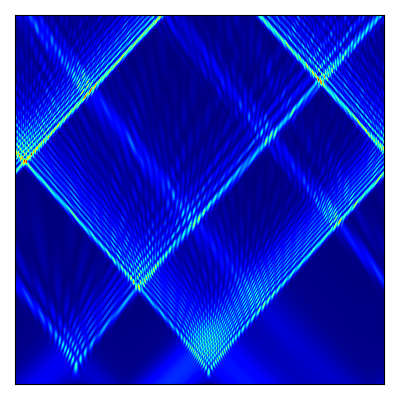

In [15]:
# fig 1a
m=25.6; qmax=51.2; N=2**12; tdim=4000;
psiLt, psiRt = fig1(m, qmax, N, tdim)
j0 = np.abs(psiLt)**2 + np.abs(psiRt)**2
fig, ax = plt.subplots()
ax.matshow(np.fliplr(np.flipud(j0)), cmap='jet')
ax.set_xticks([]); ax.set_yticks([])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=-1/axesratio)
plt.show()

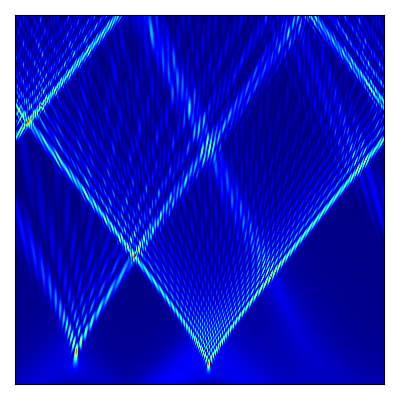

In [16]:
# fig 1b
m=64; qmax=51.2; N=2**12; tdim=4000;
psiLt, psiRt = fig1(m, qmax, N, tdim)
j0 = np.abs(psiLt)**2 + np.abs(psiRt)**2
fig, ax = plt.subplots()
ax.matshow(np.fliplr(np.flipud(j0)), cmap='jet')
ax.set_xticks([]); ax.set_yticks([])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=-1/axesratio)
plt.show()

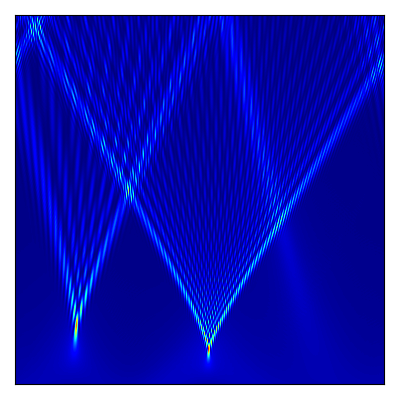

In [17]:
# fig 1c
m=128; qmax=51.2; N=2**12; tdim=4000;
psiLt, psiRt = fig1(m, qmax, N, tdim)
j0 = np.abs(psiLt)**2 + np.abs(psiRt)**2
fig, ax = plt.subplots()
ax.matshow(np.fliplr(np.flipud(j0)), cmap='jet')
ax.set_xticks([]); ax.set_yticks([])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=-1/axesratio)
plt.show()

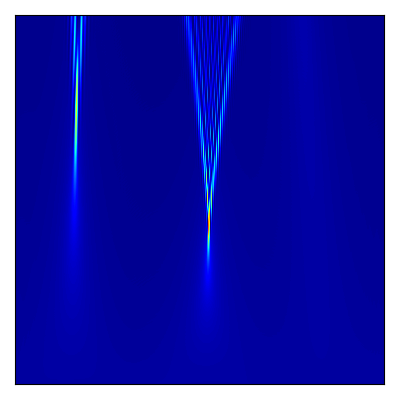

In [18]:
# fig 1d
m=512; qmax=51.2; N=2**12; tdim=4000;
psiLt, psiRt = fig1(m, qmax, N, tdim)
j0 = np.abs(psiLt)**2 + np.abs(psiRt)**2
fig, ax = plt.subplots()
ax.matshow(np.fliplr(np.flipud(j0)), cmap='jet')
ax.set_xticks([]); ax.set_yticks([])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=-1/axesratio)
plt.show()

# Figure 2

In [20]:
def fig2(m=25.6, qmax=25.6*0.2, N=8, tdim=4000):
    x = np.linspace(-pi, +pi, N, dtype=complex) # grid
    dx = 2*pi/N # grid resolution
    eps = 2*pi/N # time step
    umax = qmax/m
    theta = eps * m # rotation parameter
    phi = qmax/m * ( cos(x) ) # eq 10
    
    q = umax*( -sin(x) )
    
    # initial condition
    psiL = sqrt(sqrt(1+q**2)-q) * exp(1j*m*phi)/sqrt(2)
    psiR = sqrt(sqrt(1+q**2)+q) * exp(1j*m*phi)/sqrt(2)
    
    psiLt = np.zeros((tdim, N), dtype=complex); psiRt = np.zeros_like(psiLt)
    psiLt[0,:] = psiL; psiRt[0,:] = psiR;
    
    for t in range(tdim):
        psiL, psiR = evolve(psiL, psiR, theta, N)
        psiLt[t,:] = psiL; psiRt[t,:] = psiR;
    return psiLt, psiRt

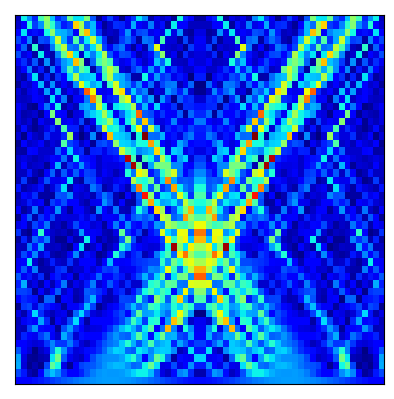

In [23]:
# fig 2a
m=25.6; qmax=51.2; N=64; tdim=50;
psiLt, psiRt = fig2(m, qmax, N, tdim)
j0 = np.abs(psiLt)**2 + np.abs(psiRt)**2
fig, ax = plt.subplots()
ax.matshow(np.fliplr(np.flipud(j0)), cmap='jet')
ax.set_xticks([]); ax.set_yticks([])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=-1/axesratio)
plt.show()

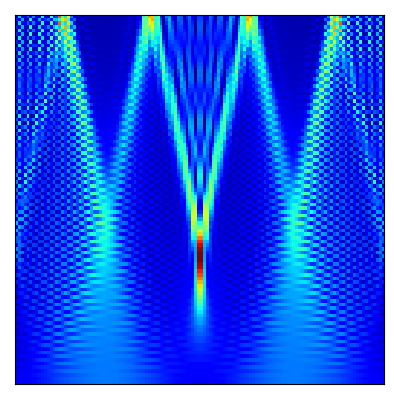

In [26]:
# fig 2b
m=25.6; qmax=51.2; N=128; tdim=100;
psiLt, psiRt = fig2(m, qmax, N, tdim)
j0 = np.abs(psiLt)**2 + np.abs(psiRt)**2
fig, ax = plt.subplots()
ax.matshow(np.fliplr(np.flipud(j0)), cmap='jet')
ax.set_xticks([]); ax.set_yticks([])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=-1/axesratio)
plt.show()

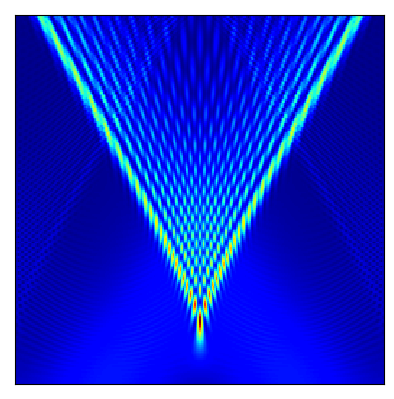

In [27]:
# fig 2c
m=25.6; qmax=51.2; N=256; tdim=200;
psiLt, psiRt = fig2(m, qmax, N, tdim)
j0 = np.abs(psiLt)**2 + np.abs(psiRt)**2
fig, ax = plt.subplots()
ax.matshow(np.fliplr(np.flipud(j0)), cmap='jet')
ax.set_xticks([]); ax.set_yticks([])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=-1/axesratio)
plt.show()

In [72]:
def eq12(x,t):
    m = 25.6
    npi = 1
    return np.abs( integrate.quad( lambda y: sqrt(m/(2*1j*pi*t)) * exp(1j*m*( (y-x)**2/(2*t) + 0.2*cos(y))) , -pi*npi, pi*npi)[0] )**2

x = np.linspace(-pi, pi, 64)
psi12 = np.zeros((64,40))
for xx in trange(64):
    for tt in range(40):
        psi12[xx,tt] = eq12(x[xx],(tt+1)*0.05)

  0%|                                                    | 0/64 [00:00<?, ?it/s]/var/folders/kc/x6xln1154cj2_452qbt9vcnr0000gq/T/ipykernel_27053/2402004781.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return np.abs( integrate.quad( lambda y: sqrt(m/(2*1j*pi*t)) * exp(1j*m*( (y-x)**2/(2*t) + 0.2*cos(y))) , -pi*npi, pi*npi)[0] )**2
/var/folders/kc/x6xln1154cj2_452qbt9vcnr0000gq/T/ipykernel_27053/2402004781.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return np.abs( integrate.quad( lambda y: sqrt(m/(2*1j*pi*t)) * exp(1j*m*( (y-x)**2/(2*

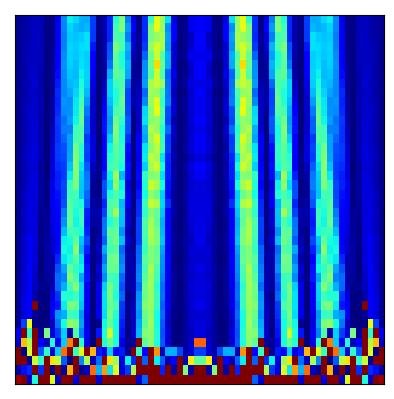

In [74]:
fig, ax = plt.subplots()
ax.matshow(np.flipud(np.transpose(psi12)), cmap='jet', vmin = 0,\
     vmax = 2)
ax.set_xticks([]); ax.set_yticks([])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
ax.set_aspect(aspect=-1/axesratio)
plt.show()